In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.stattools as sts

In [4]:
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller,acf,pacf
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [5]:
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

In [6]:
df = pd.read_csv('Main_vediogames.csv', index_col = 'reviewTime', parse_dates = True)
df.head()

,Unnamed: 0,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,title,brand,main_cat,Polarity,Analysis
reviewTime,,,,,,,,,,,,,,
2014-06-09,0,1.0,True,A21ROB4YDOZA5P,0439381673,Mary M. Clark,used play game years ago loved it. found work ...,did not like this,1402272000,brand new learning company oregon trail th edi...,by learning company,video games,0.150000,Positive
2014-05-10,1,3.0,True,A3TNZ2Q5E7HTHD,0439381673,Sarabatya,game worked great story line videos would neve...,almost perfect,1399680000,brand new learning company oregon trail th edi...,by learning company,video games,0.210000,Positive
2014-02-07,2,4.0,True,A1OKRM3QFEATQO,0439381673,Amazon Customer,learn hard way ordering macbook pro work unles...,does not work with mac os unless it is 10.3 or...,1391731200,brand new learning company oregon trail th edi...,by learning company,video games,-0.038542,Negative
2014-02-07,3,1.0,True,A2XO1JFCNEYV3T,0439381673,ColoradoPartyof5,"product description state clearly. cd, box, pr...",does not work on mac osx,1391731200,brand new learning company oregon trail th edi...,by learning company,video games,-0.150000,Negative
2014-01-16,4,4.0,True,A19WLPIRHD15TH,0439381673,Karen Robinson,would recommend learning game anyone likes lea...,roughing it,1389830400,brand new learning company oregon trail th edi...,by learning company,video games,-0.200000,Negative


In [7]:
df.isnull().sum()

Unnamed: 0            0
overall               0
verified              0
reviewerID            0
asin                  0
reviewerName        219
reviewText          897
summary              39
unixReviewTime        0
title                51
brand             22988
main_cat           1332
Polarity              0
Analysis              0
dtype: int64

In [8]:
df.dtypes

Unnamed: 0          int64
overall           float64
verified             bool
reviewerID         object
asin               object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
title              object
brand              object
main_cat           object
Polarity          float64
Analysis           object
dtype: object

In [9]:
data = df[[ 'overall']]
data.head()

,overall
reviewTime,
2014-06-09,1.0
2014-05-10,3.0
2014-02-07,4.0
2014-02-07,1.0
2014-01-16,4.0


In [10]:
data.dtypes

overall    float64
dtype: object

In [11]:
data.sort_index(inplace = True)

In [12]:
data

,overall
reviewTime,
1997-11-08,5.0
1997-11-08,5.0
1997-11-29,5.0
1997-11-29,5.0
1997-12-12,5.0
...,...
2018-10-02,1.0
2018-10-02,5.0
2018-10-02,5.0


In [13]:
data.isnull().sum()

overall    0
dtype: int64

In [14]:
monthly = data.resample('M').mean()
monthly.head(10)

,overall
reviewTime,
1997-11-30,5.000000
1997-12-31,3.333333
1998-01-31,1.000000
1998-02-28,NaN
1998-03-31,NaN
1998-04-30,5.000000
1998-05-31,5.000000
1998-06-30,NaN
1998-07-31,NaN


In [92]:
monthly.shape

(236, 1)

In [17]:
monthly['overall'] = monthly['overall'].fillna(monthly['overall'].median())

In [18]:
monthly.head(10)

,overall
reviewTime,
1997-11-30,5.000000
1997-12-31,3.333333
1998-01-31,1.000000
1998-02-28,3.983295
1998-03-31,3.983295
1998-04-30,5.000000
1998-05-31,5.000000
1998-06-30,3.983295
1998-07-31,3.983295


In [19]:
monthly.isnull().sum()

overall    0
dtype: int64

In [20]:
decompose = seasonal_decompose(monthly, period = 12)

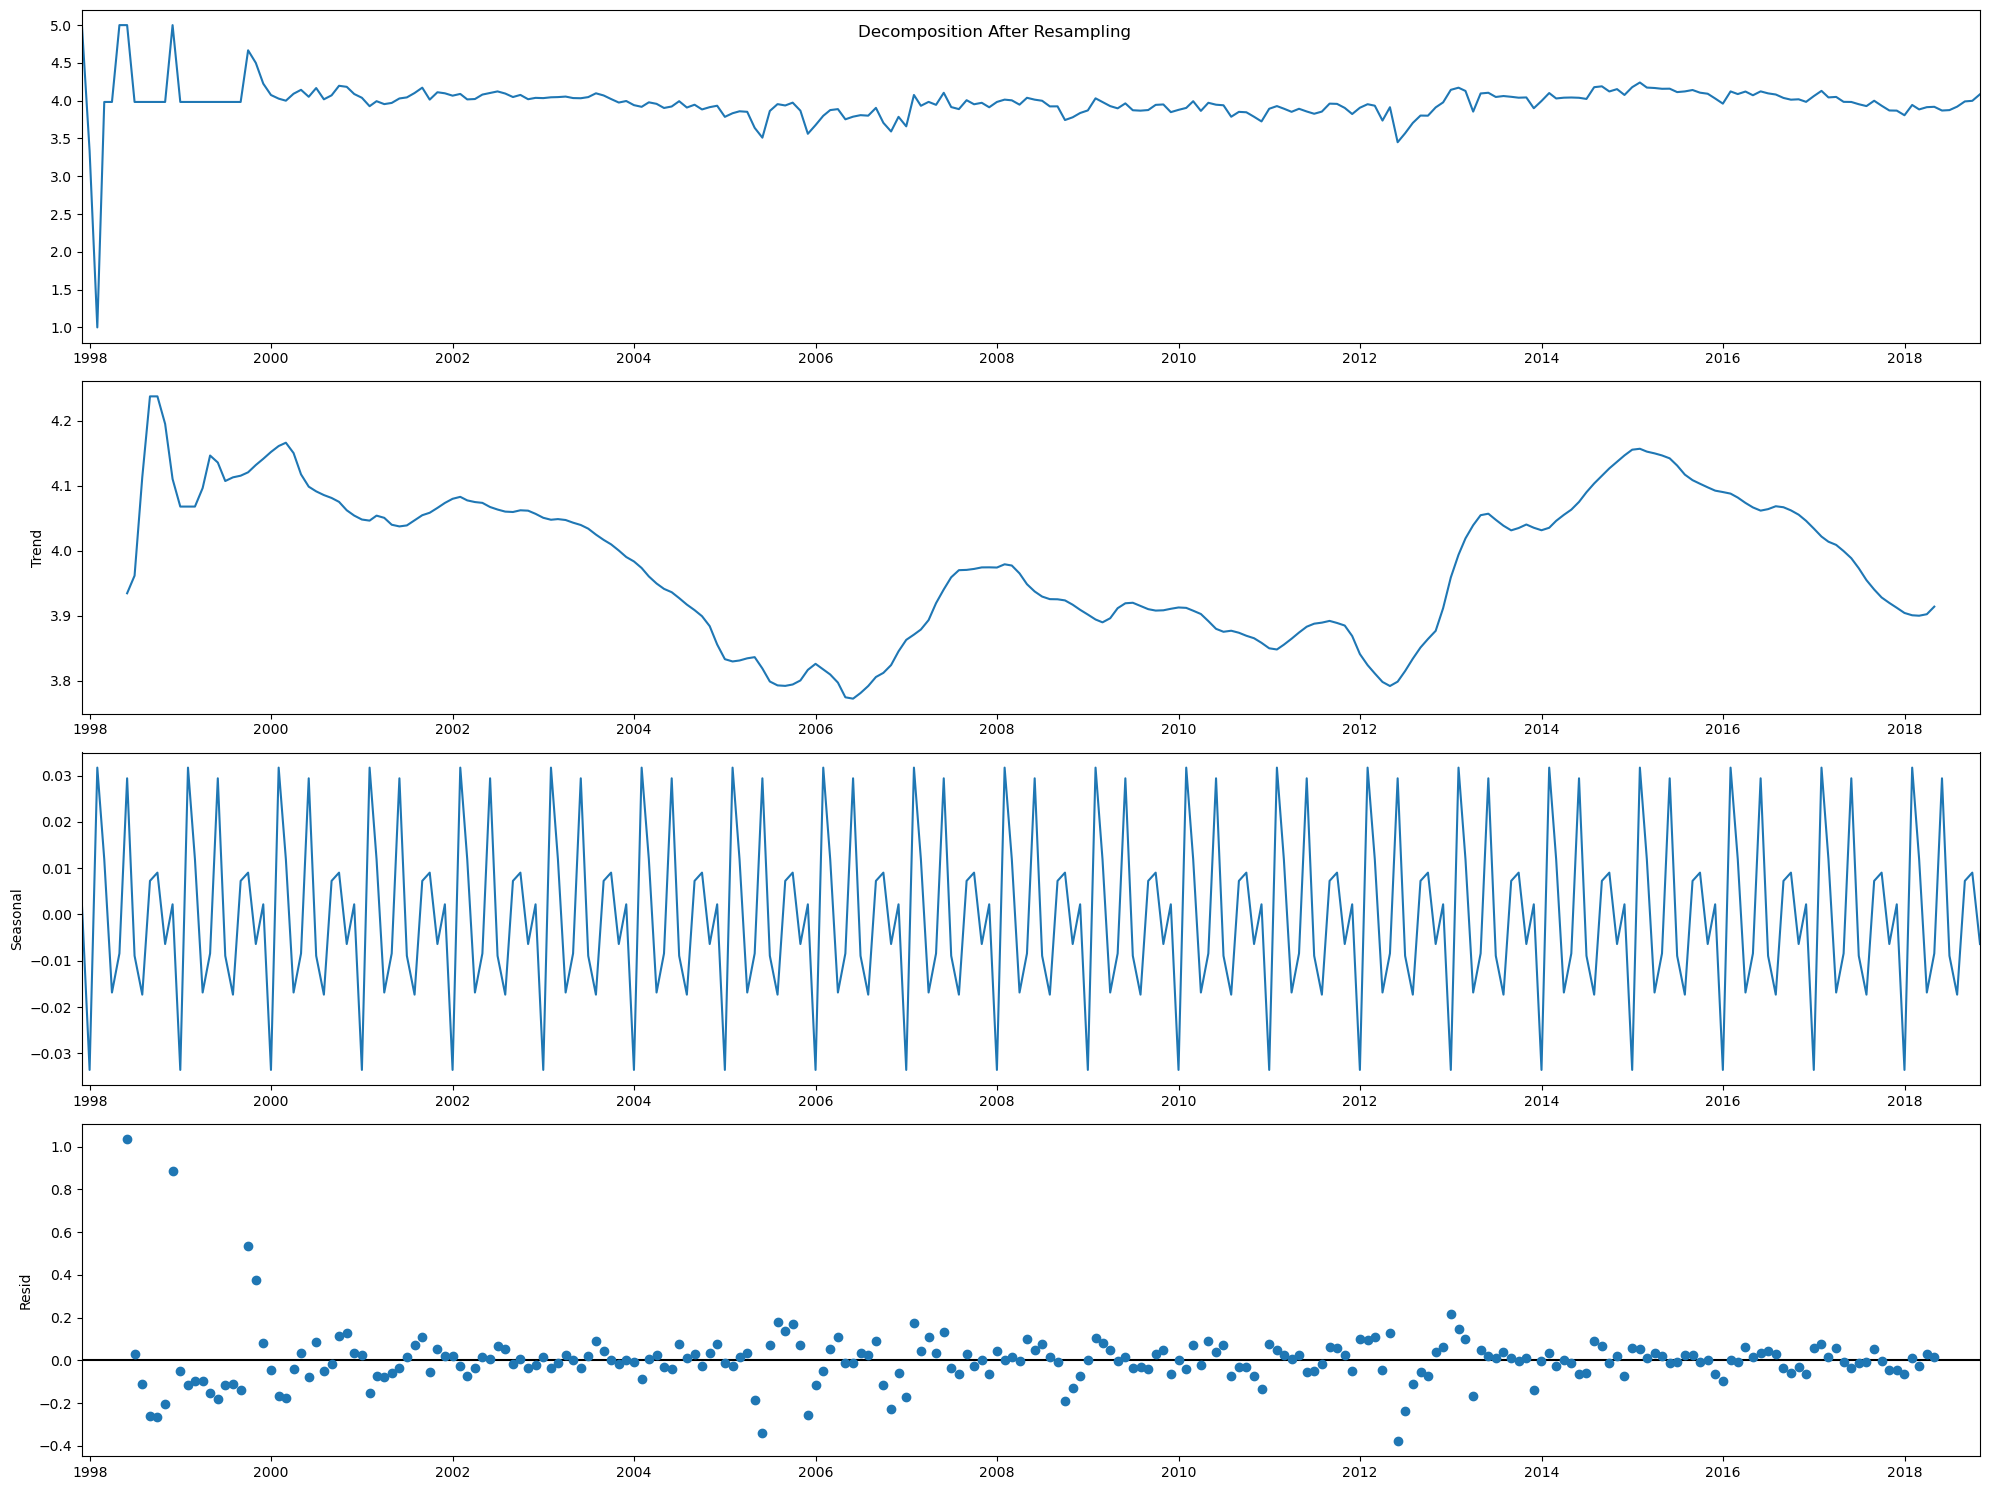

In [21]:
rcParams['figure.figsize'] = 20,15
decompose.plot().suptitle('Decomposition After Resampling');

# STATIONARITY

In [22]:
def checkStationary(data):
    pvalue = adfuller(data['overall'])[1]
    print(pvalue)

    if pvalue < 0.05:
        print("Data is Stationary. Proceed to model building")
    else:
        print("Data is not Stationary. Make the data stationary before model building")

In [23]:
checkStationary(monthly)

0.010147605308680389
Data is Stationary. Proceed to model building


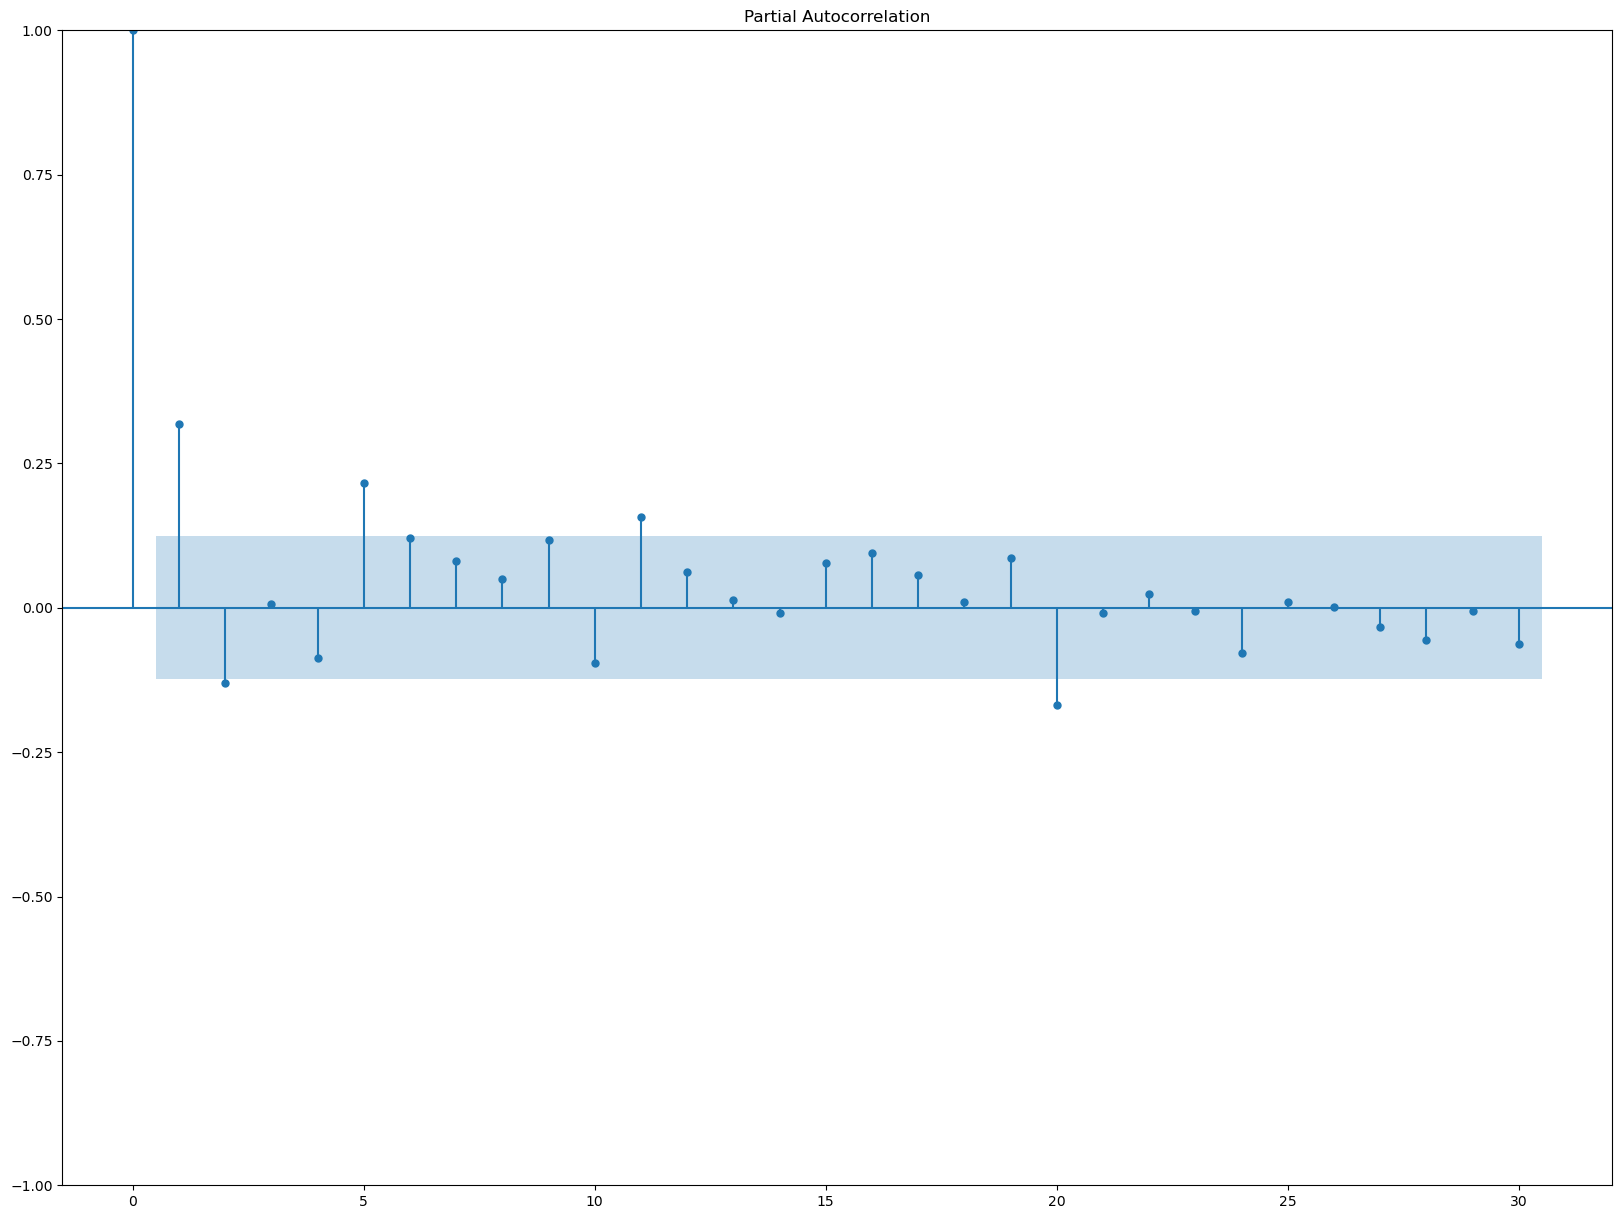

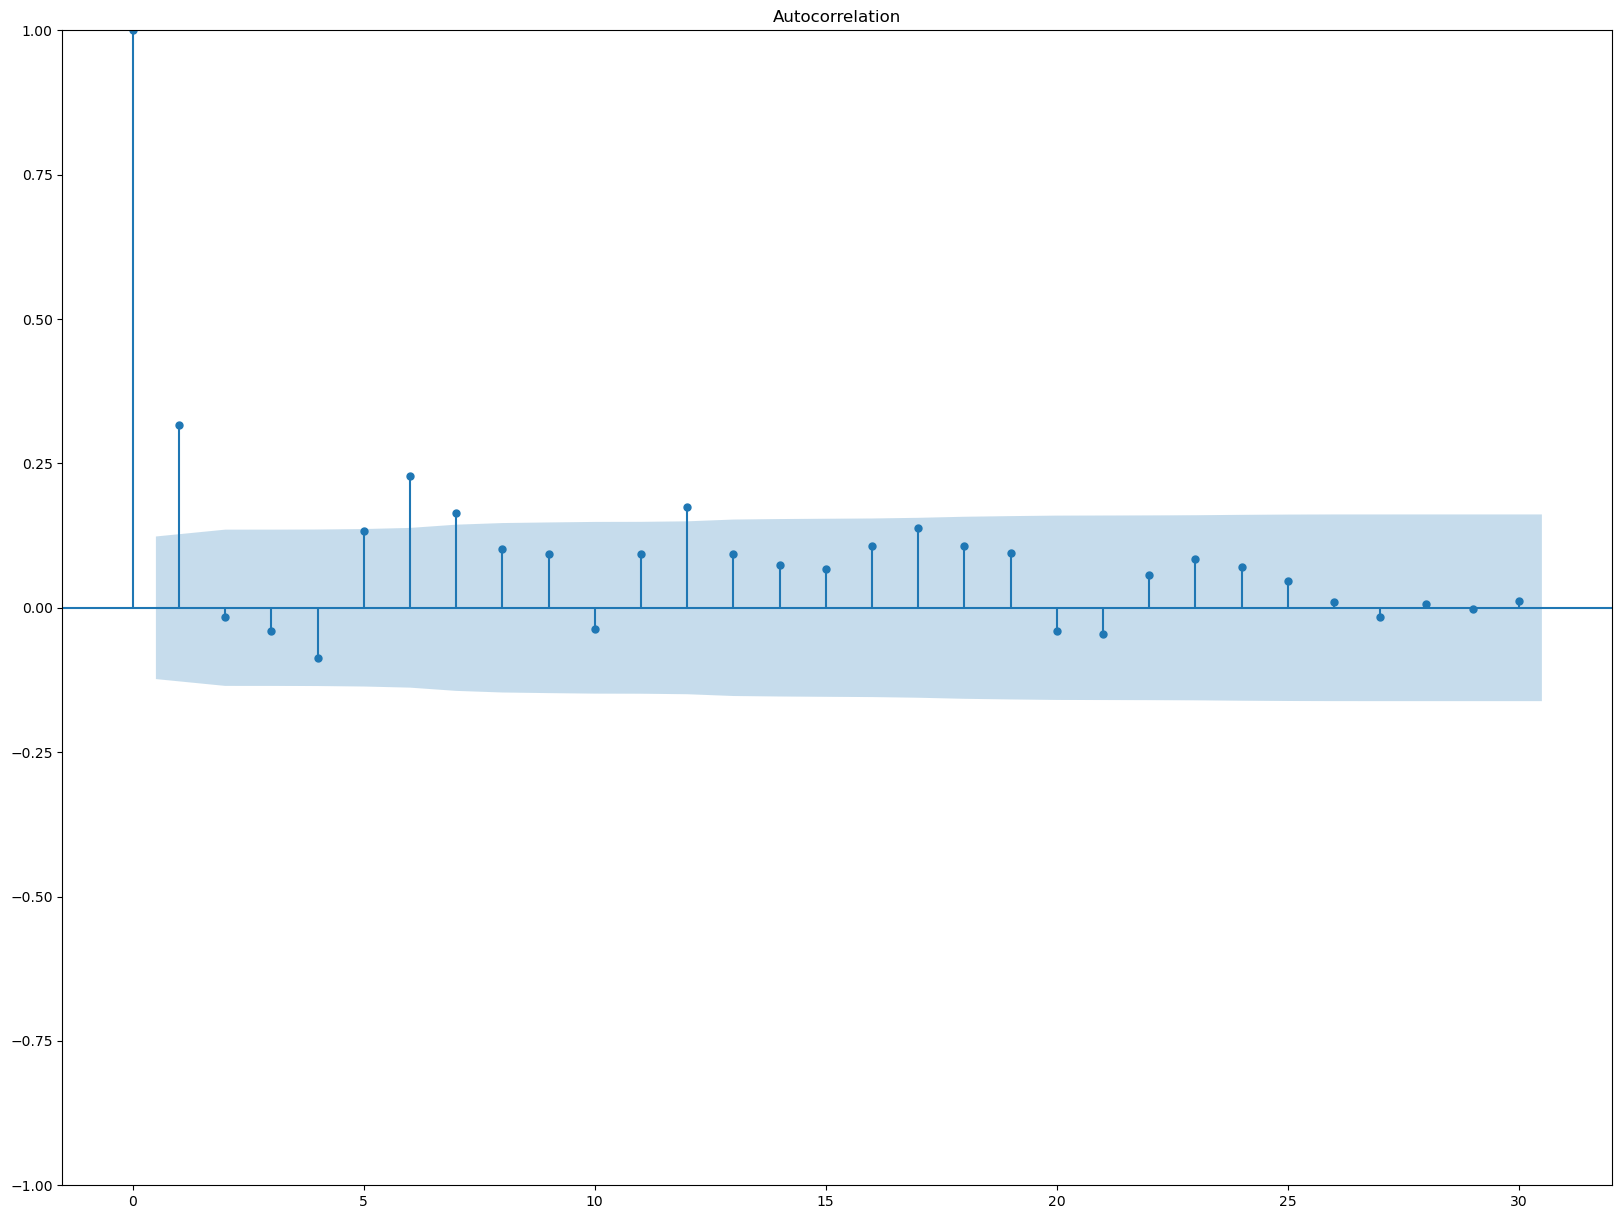

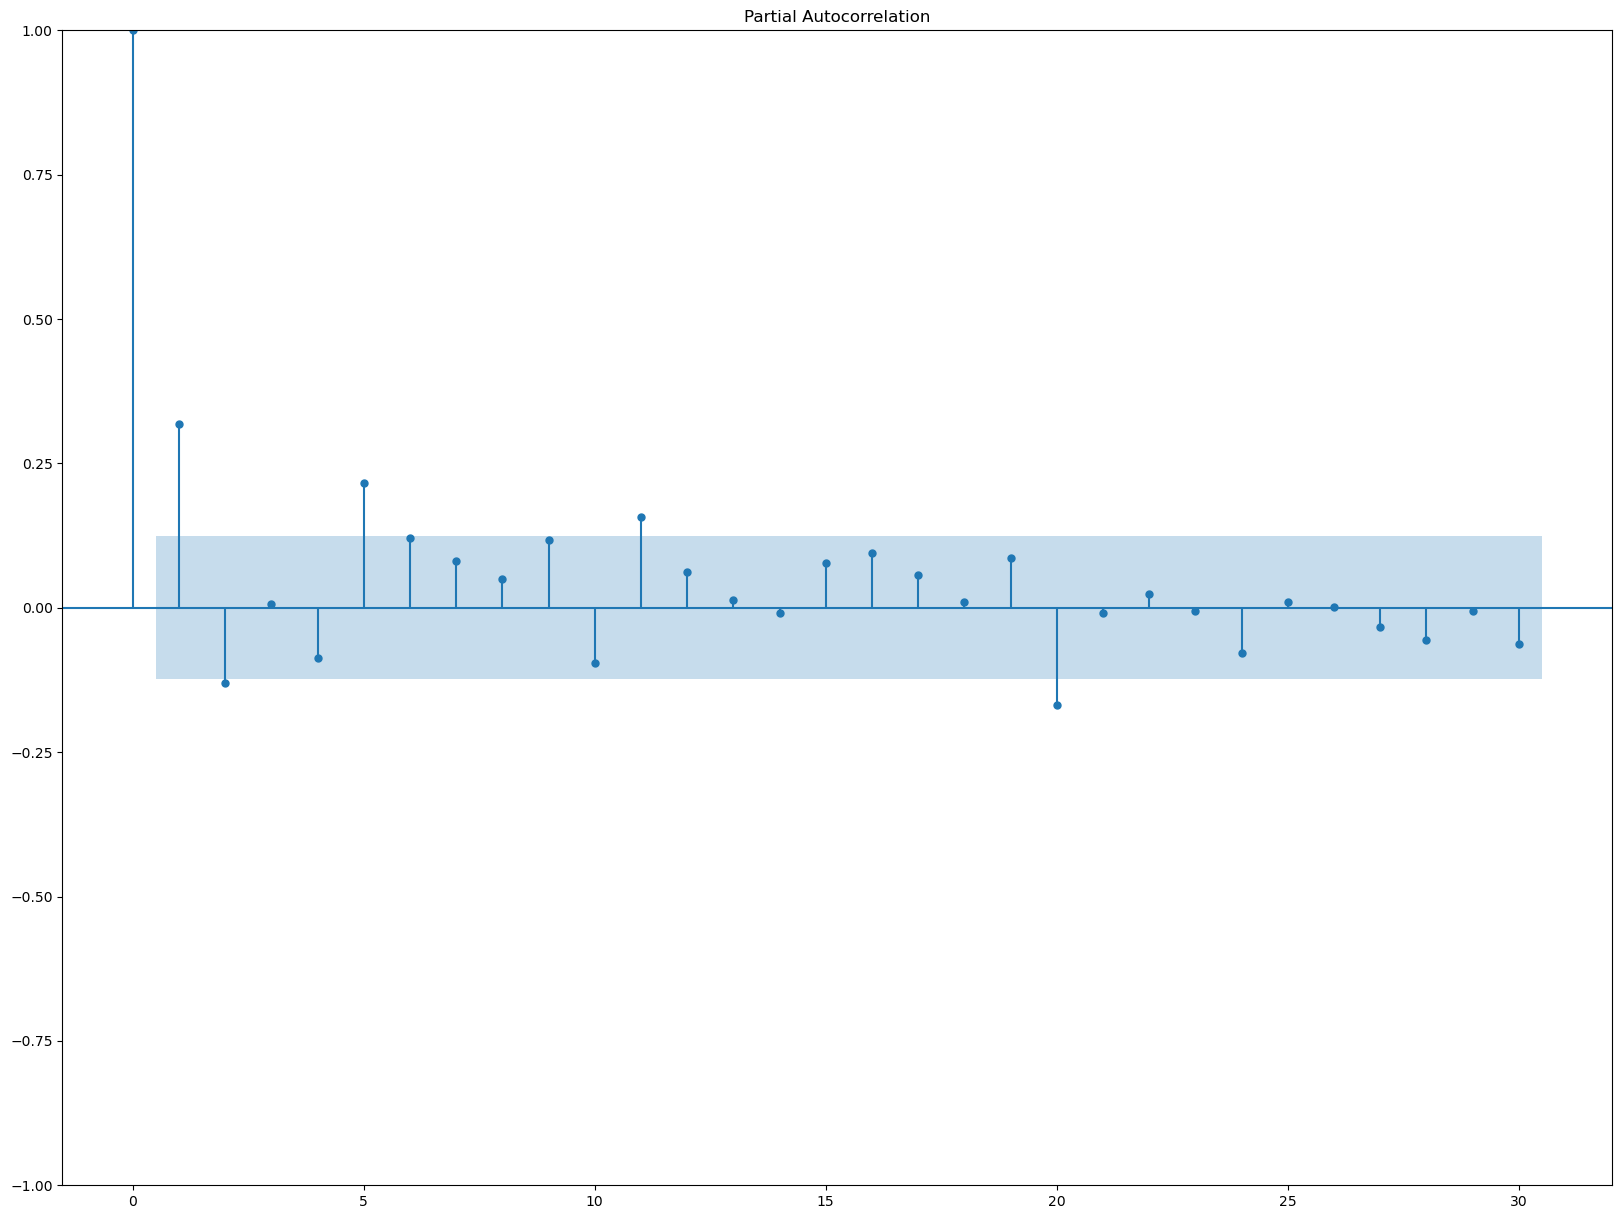

In [24]:
plot_acf(monthly , lags = 30)
plot_pacf(monthly, lags = 30)

## p = 5

## q = 3

# ARIMA

In [25]:
for p in range(1, 6):
    for q in range(1, 4):
        arima = ARIMA(monthly, order = (p, 0, q))
        result = arima.fit()
        print('AIC value for models', (p, 0, q), '= ', result.aic)

AIC value for models (1, 0, 1) =  27.754099975282173
AIC value for models (1, 0, 2) =  29.641358814094275
AIC value for models (1, 0, 3) =  26.809851101106233
AIC value for models (2, 0, 1) =  27.3275148732979


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (2, 0, 2) =  -2.5967505438712664


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (2, 0, 3) =  11.907461370017487
AIC value for models (3, 0, 1) =  27.683796754807602


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (3, 0, 2) =  -1.8004721534418167


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (3, 0, 3) =  -10.759550321248085
AIC value for models (4, 0, 1) =  19.500640934873303
AIC value for models (4, 0, 2) =  -1.9469140296119463


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (4, 0, 3) =  -7.09027896969512
AIC value for models (5, 0, 1) =  -22.594524713197472


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (5, 0, 2) =  -20.595926917228553
AIC value for models (5, 0, 3) =  -14.709539965499005


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Least AIC Value is at : 5, 0, 1

In [45]:
model = ARIMA(monthly, order = (5, 0, 1))

fit = model.fit()
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  252
Model:                 ARIMA(5, 0, 1)   Log Likelihood                  19.297
Date:                Thu, 06 Apr 2023   AIC                            -22.595
Time:                        10:59:03   BIC                              5.641
Sample:                    11-30-1997   HQIC                           -11.233
                         - 10-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9771      0.031    127.191      0.000       3.916       4.038
ar.L1          0.8623      0.044     19.452      0.000       0.775       0.949
ar.L2         -0.1855      0.041     -4.480      0.0

In [46]:
pval = sm.stats.acorr_ljungbox(fit.resid , lags = [1] , return_df = True)['lb_pvalue'].values
print(pval)

if pval < 0.05:
    print('Reject H0 . Bad Model')
else:
    print('Cannot Reject H0. Model is good')

[0.16531531]
Cannot Reject H0. Model is good


In [47]:
predictions = fit.predict(0, len(monthly)-1)
print(predictions)

reviewTime
1997-11-30    3.977133
1997-12-31    4.493310
1998-01-31    2.807089
1998-02-28    2.096489
1998-03-31    4.760003
                ...   
2018-06-30    3.918066
2018-07-31    3.903381
2018-08-31    3.933248
2018-09-30    3.980087
2018-10-31    3.956083
Freq: M, Name: predicted_mean, Length: 252, dtype: float64


In [48]:
actual = []
prediction = []

In [49]:
for i in range(len(predictions)):
    actual.append(monthly['overall'][i])
    prediction.append(predictions[i])

df_result = pd.DataFrame({'Actual' : actual , 'Predictions' : prediction})
df_result['error'] = df_result['Actual'] - df_result['Predictions']

df_result

,Actual,Predictions,error
0,5.000000,3.977133,1.022867
1,3.333333,4.493310,-1.159977
2,1.000000,2.807089,-1.807089
3,3.983295,2.096489,1.886807
4,3.983295,4.760003,-0.776708
...,...,...,...
247,3.875348,3.918066,-0.042719
248,3.921163,3.903381,0.017781
249,3.990241,3.933248,0.056993
250,3.998310,3.980087,0.018223


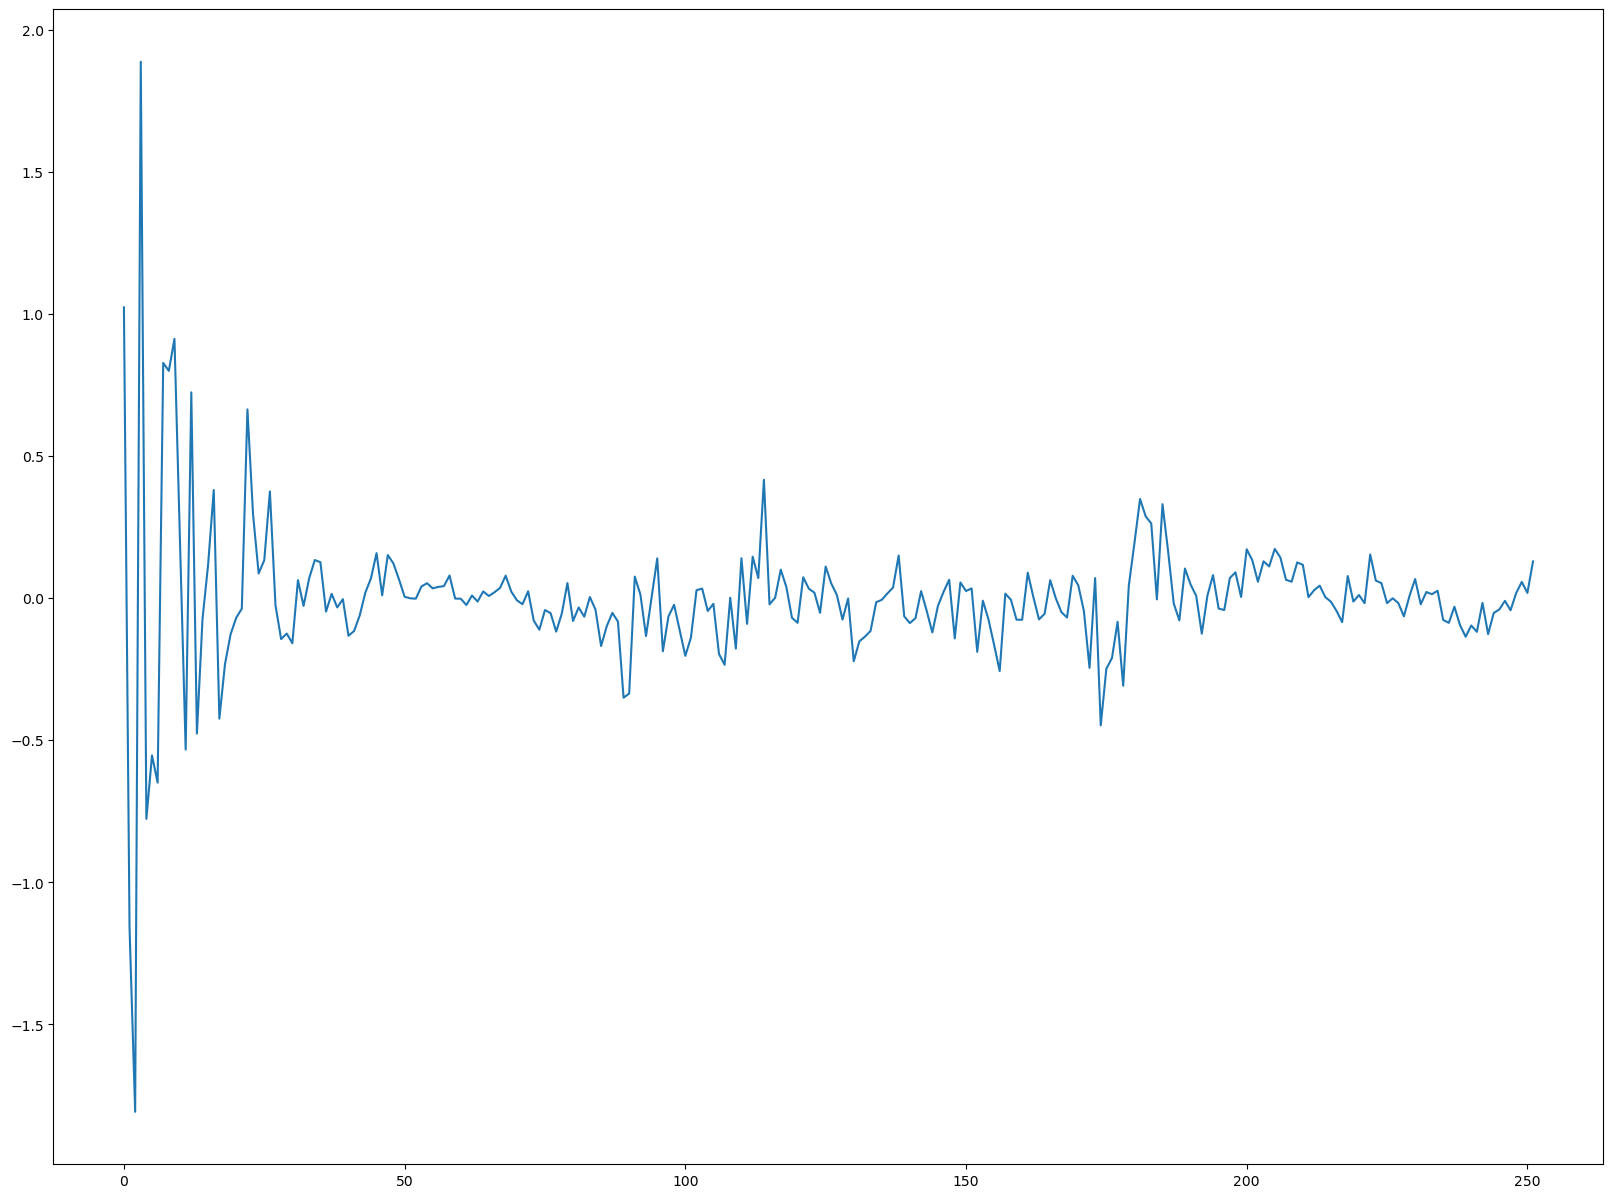

In [50]:
df_result['error'].plot();

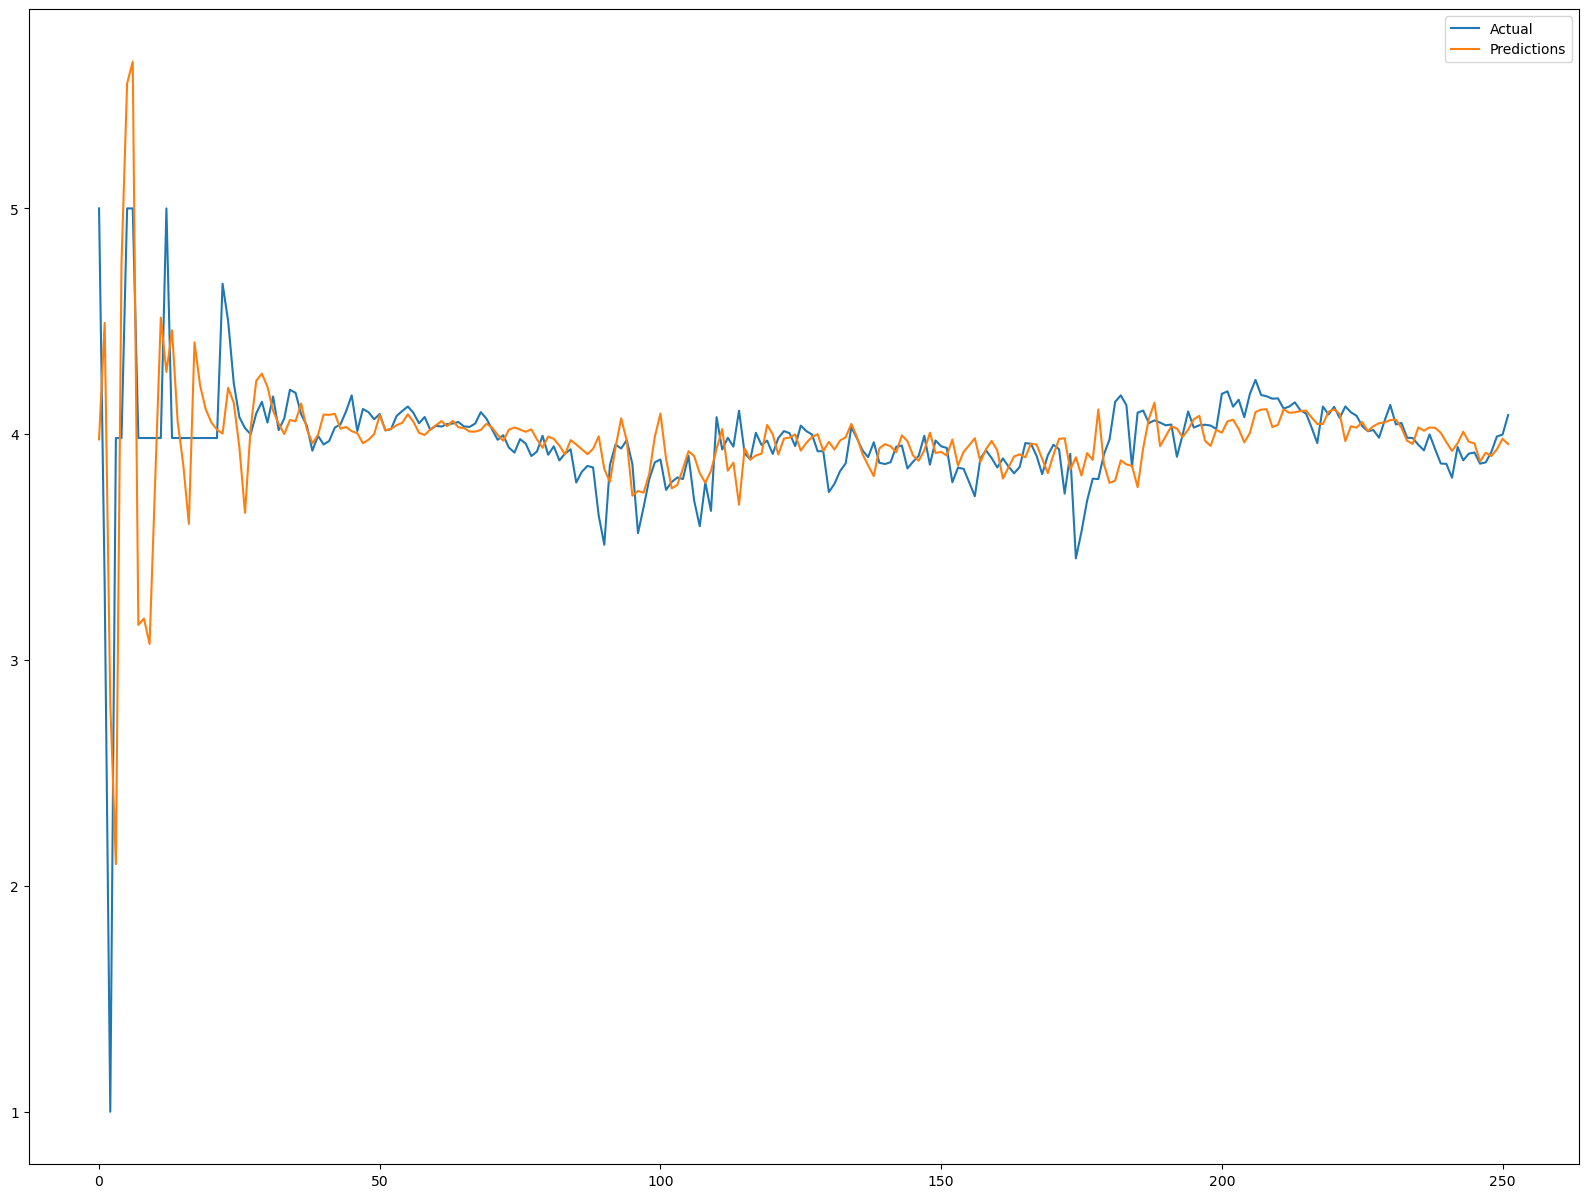

In [51]:
df_result['Actual'].plot(legend = True);
df_result['Predictions'].plot(legend = True);

In [52]:
forecast = fit.forecast(36)

In [61]:
forecast

2018-11-30    3.946913
2018-12-31    3.888780
2019-01-31    3.891450
2019-02-28    3.904206
2019-03-31    4.020560
2019-04-30    4.049815
2019-05-31    4.014372
2019-06-30    3.958066
2019-07-31    3.883591
2019-08-31    3.898896
2019-09-30    3.963843
2019-10-31    4.023820
2019-11-30    4.048971
2019-12-31    3.998254
2020-01-31    3.930054
2020-02-29    3.898769
2020-03-31    3.921976
2020-04-30    3.989722
2020-05-31    4.038091
2020-06-30    4.030727
2020-07-31    3.978208
2020-08-31    3.920354
2020-09-30    3.908699
2020-10-31    3.949985
2020-11-30    4.008340
2020-12-31    4.037893
2021-01-31    4.013640
2021-02-28    3.958173
2021-03-31    3.918011
2021-04-30    3.924725
2021-05-31    3.972499
2021-06-30    4.020665
2021-07-31    4.030078
2021-08-31    3.994713
2021-09-30    3.944443
2021-10-31    3.921139
Freq: M, Name: predicted_mean, dtype: float64

In [62]:
given = pd.concat([monthly['overall'] , forecast[0:1]] , axis = 0)

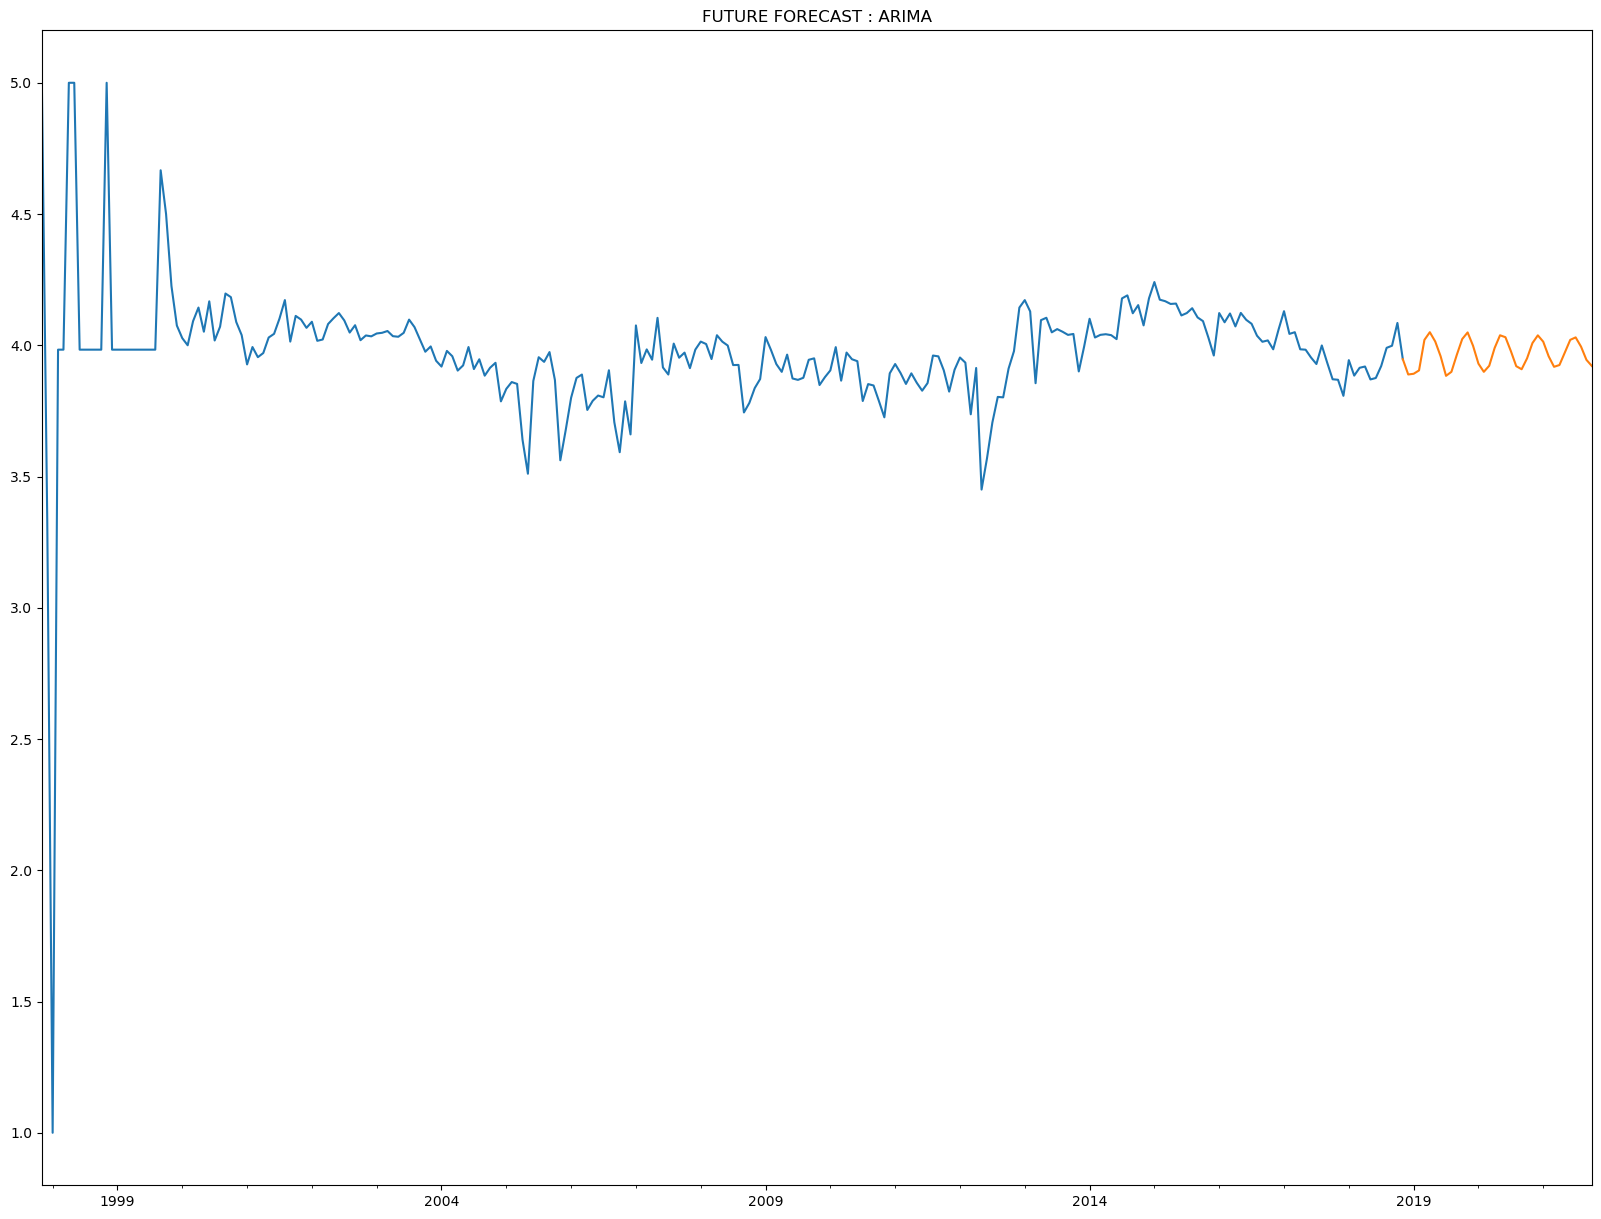

In [63]:
plt.title('FUTURE FORECAST : ARIMA');

given.plot();
forecast.plot();

## ARMA

In [121]:
for p2 in range(1,6):
    for q2 in range(1,4):
            arma3 = ARIMA(monthly, order = (p2, 0, q2))
            fit = arma3.fit()
            print(p2, 0, q2,'====', fit.aic)

1 0 1 ==== 27.754099975282173
1 0 2 ==== 29.641358814094275
1 0 3 ==== 26.809851101106233
2 0 1 ==== 27.3275148732979


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2 0 2 ==== -2.5967505438712664


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2 0 3 ==== 11.907461370017487
3 0 1 ==== 27.683796754807602


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3 0 2 ==== -1.8004721534418167


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3 0 3 ==== -10.759550321248085
4 0 1 ==== 19.500640934873303
4 0 2 ==== -1.9469140296119463


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4 0 3 ==== -7.09027896969512
5 0 1 ==== -22.594524713197472


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5 0 2 ==== -20.595926917228553
5 0 3 ==== -14.709539965499005


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [123]:
model3 = ARIMA(monthly, order = (5, 0, 1))

res3 = model3.fit()

print(res3.aic)

-22.594524713197472


In [124]:
def pval(d):
    p = sm.stats.acorr_ljungbox(d.resid, lags = [1], return_df = True)['lb_pvalue'].values
    
    print(p)
    if p<0.05:
        print("Reject H0: Model is NOT Good")
    else:
        print("Accept HO: Model is fine")

In [125]:
pval(res3)

[0.16531531]
Accept HO: Model is fine


In [126]:
prediction3 = res3.predict(0, len(monthly) - 1)
print(prediction3)

reviewTime
1997-11-30    3.977133
1997-12-31    4.493310
1998-01-31    2.807089
1998-02-28    2.096489
1998-03-31    4.760003
                ...   
2018-06-30    3.918066
2018-07-31    3.903381
2018-08-31    3.933248
2018-09-30    3.980087
2018-10-31    3.956083
Freq: M, Name: predicted_mean, Length: 252, dtype: float64


In [127]:
actual_arma = []
prediction_arma = []

In [130]:
for i in range(len(prediction3)):
    actual.append(monthly['overall'][i])
    prediction.append(prediction3[i])

val_df3 = pd.DataFrame({"Actual Values" : actual, "Predicted Values" : prediction})
val_df3['Difference(Error)'] = val_df3['Actual Values'] - val_df3['Predicted Values']
print(val_df3.head())

   Actual Values  Predicted Values  Difference(Error)
0       5.000000          3.977133           1.022867
1       3.333333          4.493310          -1.159977
2       1.000000          2.807089          -1.807089
3       3.983295          2.096489           1.886807
4       3.983295          4.760003          -0.776708


In [131]:
future3 = res3.forecast(36)

In [133]:
given = pd.concat([monthly['overall'] , future3[0:1]] , axis = 0)

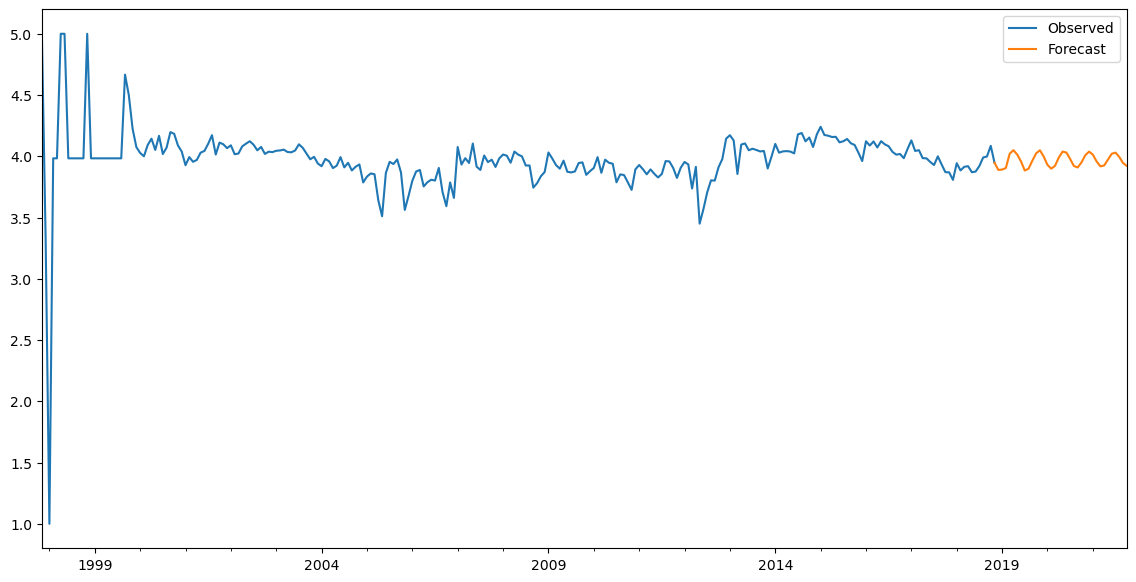

In [134]:
ax = given.plot(label = 'Observed', figsize=(14, 7))
future3.plot(label = "Forecast")

plt.legend()
plt.show()

## SPLITTING : WORKING ON TRAINING DATA ONLY

In [28]:
len(monthly)

252

In [29]:
split_at = 0.7 * len(monthly)
split_at

176.39999999999998

In [30]:
training = monthly.iloc[:176]
testing = monthly.iloc[176:]

In [31]:
print("TRAIN = {}, TEST = {}".format(len(training), len(testing)))

TRAIN = 176, TEST = 76


In [32]:
for p in range(1,7):
    for q in range(1,7):
        arima = ARIMA(training, order = (p, 0, q))
        armfit = arima.fit()
        print('AIC value for models',(p, 0, q), '= ', armfit.aic)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (1, 0, 1) =  70.34403755190084
AIC value for models (1, 0, 2) =  77.48236229469475
AIC value for models (1, 0, 3) =  76.70262356372243
AIC value for models (1, 0, 4) =  70.0698026870303


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (1, 0, 5) =  33.993030805738485


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (1, 0, 6) =  33.14970745905266
AIC value for models (2, 0, 1) =  74.42420289315808
AIC value for models (2, 0, 2) =  53.00480642220573
AIC value for models (2, 0, 3) =  64.75667268208925


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (2, 0, 4) =  65.87476285298175


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (2, 0, 5) =  33.37816146349757


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (2, 0, 6) =  34.79941511115423
AIC value for models (3, 0, 1) =  73.69992065409201
AIC value for models (3, 0, 2) =  55.003578761108045


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (3, 0, 3) =  47.72447082078714


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (3, 0, 4) =  64.5290713532562


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (3, 0, 5) =  36.210915181201614


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (3, 0, 6) =  30.121015598520813


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (4, 0, 1) =  60.966972111557716
AIC value for models (4, 0, 2) =  53.44021493576918


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (4, 0, 3) =  42.874453573493355


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (4, 0, 4) =  44.79071577490221


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (4, 0, 5) =  37.89208761295849


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (4, 0, 6) =  38.02956611249867


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (5, 0, 1) =  36.0473868146528


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (5, 0, 2) =  37.64991151405839


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (5, 0, 3) =  37.4661162276955


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (5, 0, 4) =  33.64110911285704


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (5, 0, 5) =  38.42329919507259


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (5, 0, 6) =  44.36095795122319


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (6, 0, 1) =  37.55860465521356


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (6, 0, 2) =  31.84750242531952


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (6, 0, 3) =  35.48520047901094


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (6, 0, 4) =  33.075576086761714


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC value for models (6, 0, 5) =  31.37632849938148
AIC value for models (6, 0, 6) =  29.670563049134756


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Least AIC Value is at : 6, 0, 6

In [33]:
model2 = ARIMA(training, order = (6, 0, 6))

fit2 = model2.fit()
print(fit2.summary())

                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  176
Model:                 ARIMA(6, 0, 6)   Log Likelihood                  -0.835
Date:                Thu, 06 Apr 2023   AIC                             29.671
Time:                        10:55:02   BIC                             74.057
Sample:                    11-30-1997   HQIC                            47.674
                         - 06-30-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9489      0.052     76.548      0.000       3.848       4.050
ar.L1          0.6087      0.150      4.065      0.000       0.315       0.902
ar.L2         -0.1410      0.141     -1.003      0.3

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
pval2 = sm.stats.acorr_ljungbox(fit2.resid , lags = [1] , return_df = True)['lb_pvalue'].values
print(pval2)

if pval2 < 0.05:
    print('Reject H0 . Bad Model')
else:
    print('Cannot Reject H0. Model is good')

[0.1128413]
Cannot Reject H0. Model is good


In [35]:
predictions = fit2.predict(0, len(testing)-1)
print(predictions)

reviewTime
1997-11-30    3.948859
1997-12-31    4.460440
1998-01-31    2.913017
1998-02-28    2.110073
1998-03-31    4.621650
                ...   
2003-10-31    4.020323
2003-11-30    3.967923
2003-12-31    4.032133
2004-01-31    4.027987
2004-02-29    4.040561
Freq: M, Name: predicted_mean, Length: 76, dtype: float64


In [36]:
actual = []
prediction = []

In [37]:
for i in range(len(predictions)):
    actual.append(testing['overall'][i])
    prediction.append(predictions[i])

df_result = pd.DataFrame({'Actual' : actual , 'Predictions' : prediction})
df_result['error'] = df_result['Actual'] - df_result['Predictions']

df_result

,Actual,Predictions,error
0,3.705724,3.948859,-0.243135
1,3.803283,4.460440,-0.657157
2,3.801586,2.913017,0.888569
3,3.911103,2.110073,1.801031
4,3.977691,4.621650,-0.643959
...,...,...,...
71,3.875348,4.020323,-0.144975
72,3.921163,3.967923,-0.046760
73,3.990241,4.032133,-0.041892
74,3.998310,4.027987,-0.029677


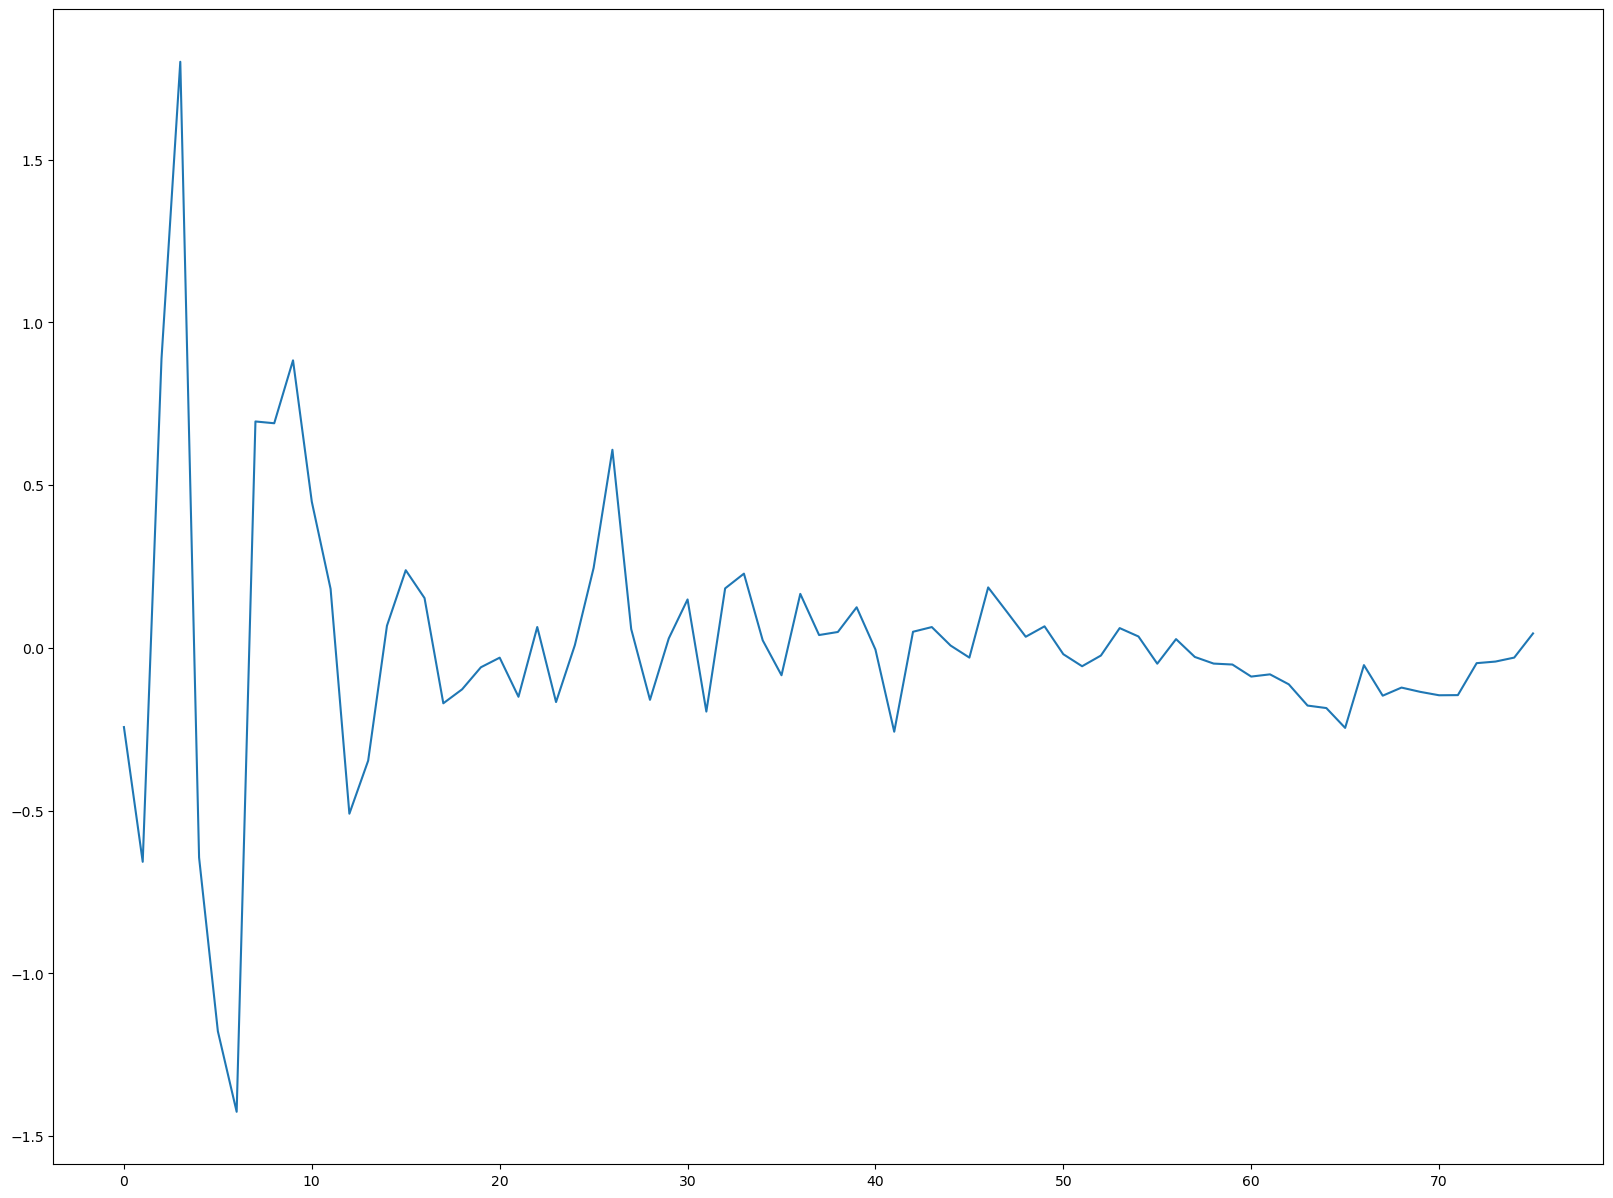

In [38]:
df_result['error'].plot();

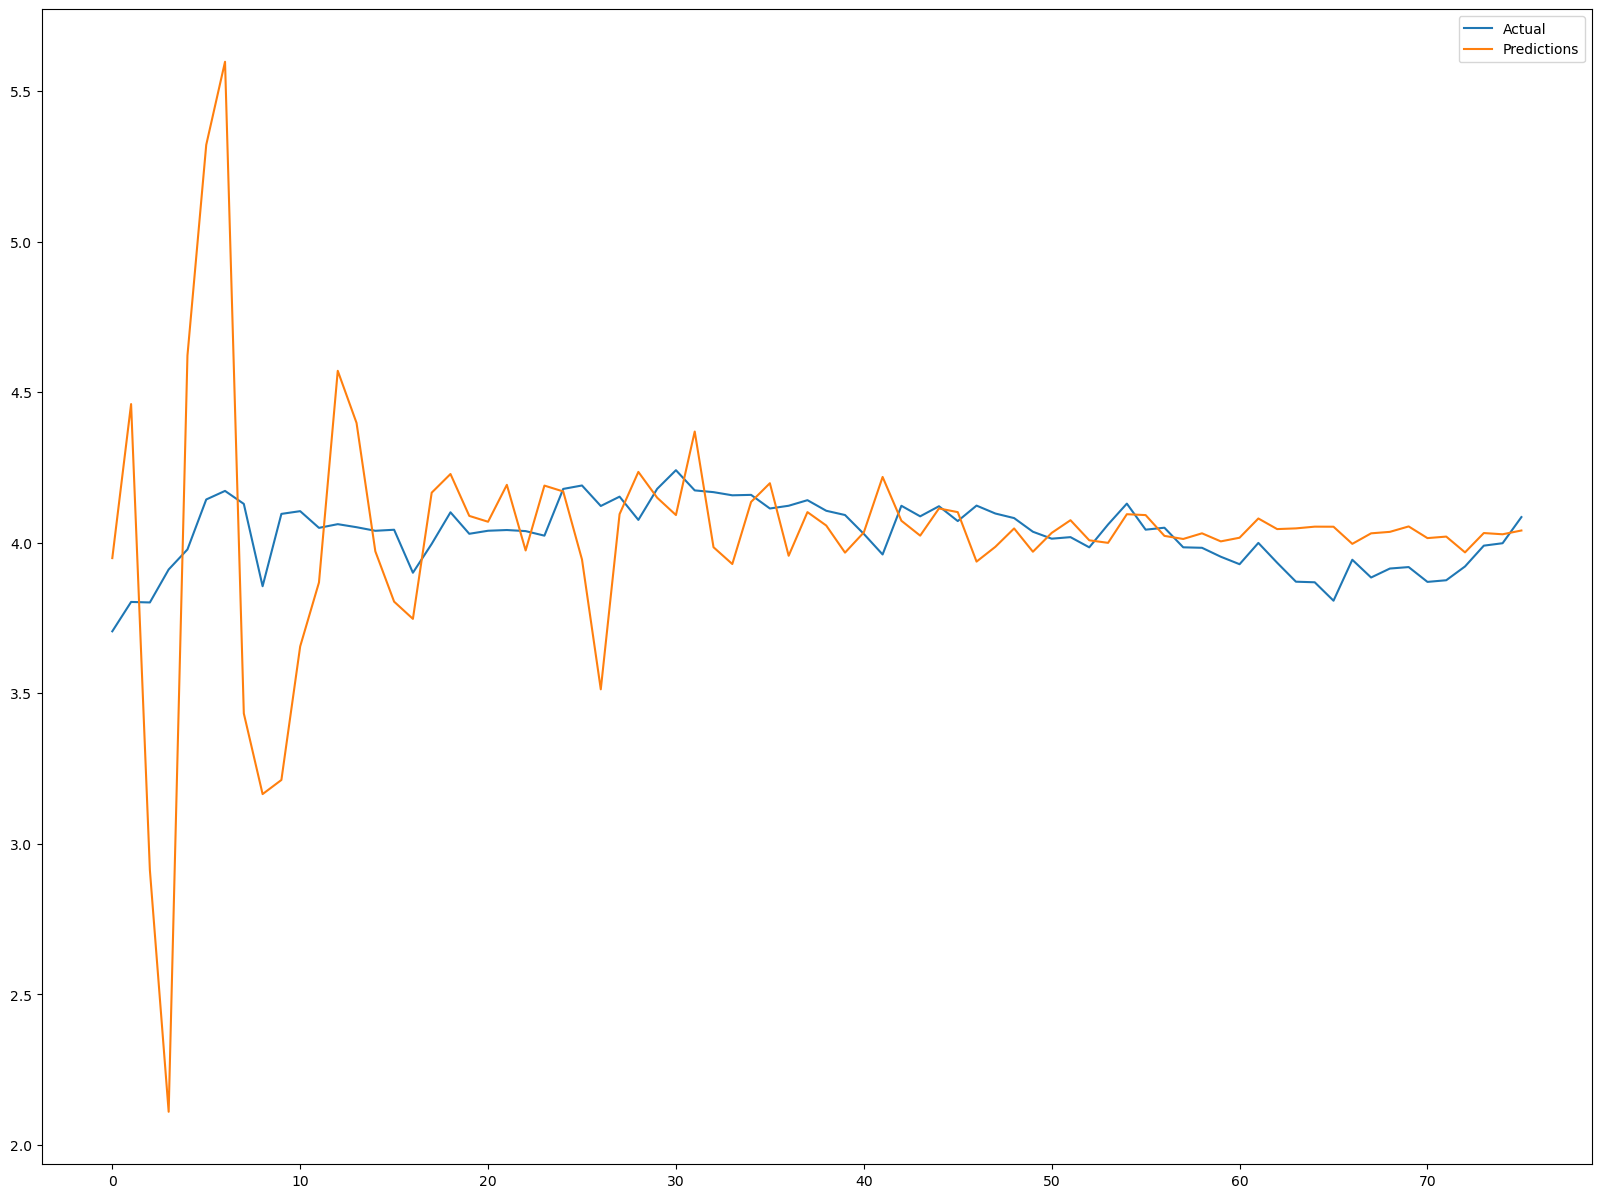

In [39]:
df_result['Actual'].plot(legend = True);
df_result['Predictions'].plot(legend = True);

In [65]:
forecast2 = fit2.forecast(36)

In [66]:
given2 = pd.concat([training['overall'] , forecast2[0:1]] , axis = 0)

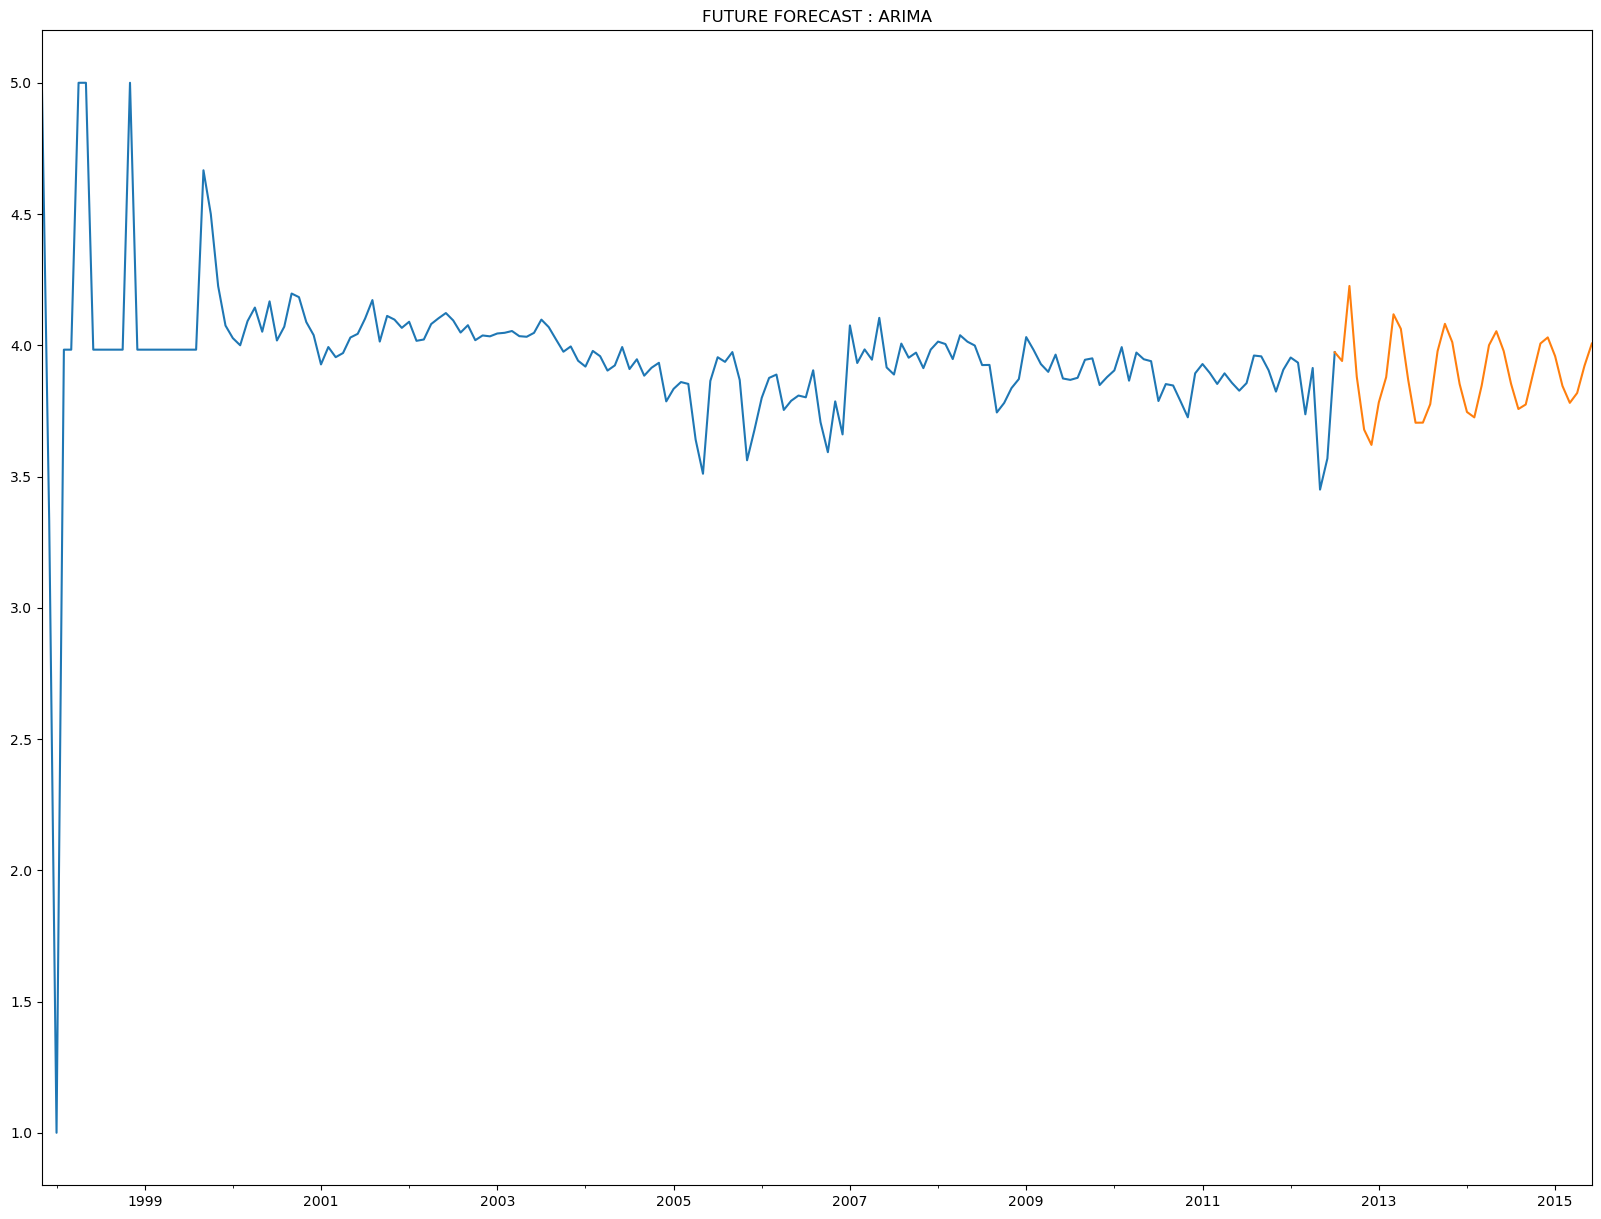

In [67]:
plt.title('FUTURE FORECAST : ARIMA');

given2.plot();
forecast2.plot();